In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df = pd.read_excel(r"C:\Users\DYNABOOK\Downloads\housing.xlsx")

In [180]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [181]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [182]:
df=df.dropna()

In [183]:
import numpy as np

# Check for NaN values
print(df.isnull().sum())

# Check for infinite values
print(df.isin([np.inf, -np.inf]).sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [184]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True).astype(int)  
print(df)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0           -122        37                  41          880             129   
1           -122        37                  21         7099            1106   
2           -122        37                  52         1467             190   
3           -122        37                  52         1274             235   
4           -122        37                  52         1627             280   
...          ...       ...                 ...          ...             ...   
20635       -121        39                  25         1665             374   
20636       -121        39                  18          697             150   
20637       -121        39                  17         2254             485   
20638       -121        39                  18         1860             409   
20639       -121        39                  16         2785             616   

       population  households  median_income  media

In [185]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,1,0


using one hot encoding to convert ocean_prox column into numerical column

In [186]:
df.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

dropping null value rows

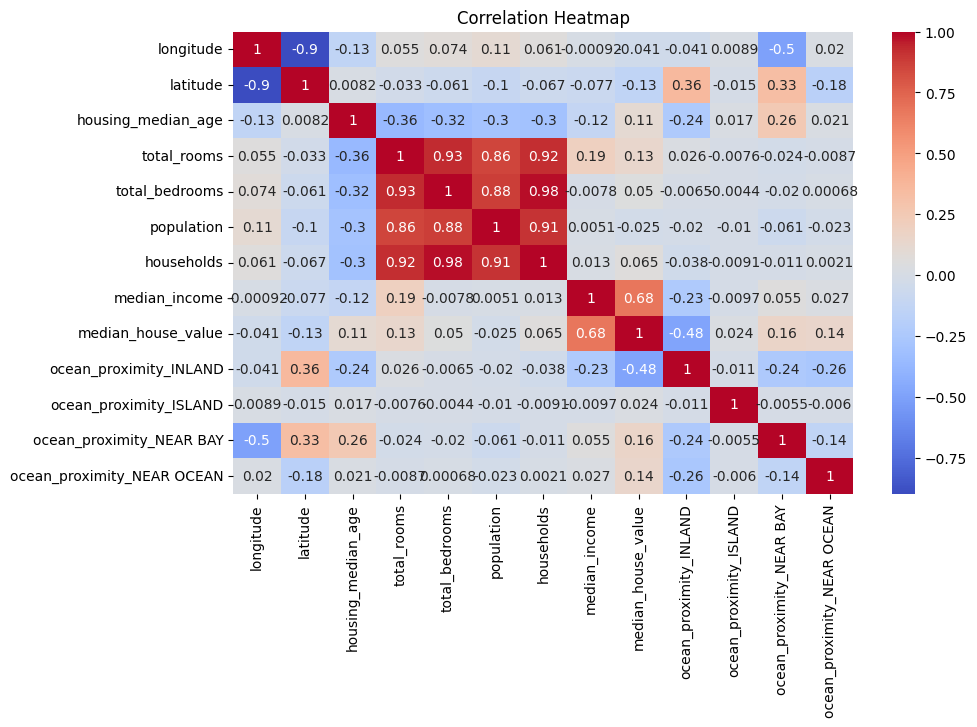

In [187]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [195]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                  'total_bedrooms', 'population', 'households', 'median_income']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


KeyError: "['total_rooms', 'total_bedrooms', 'households'] not in index"

Feature scaling is done here

In [155]:
print(df.dtypes)


longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value              int64
ocean_proximity_INLAND          int64
ocean_proximity_ISLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object


model without any feature selection or engineering

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define Features (X) and Target Variable (y)
X = df.drop(columns=['median_house_value'])  
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("✅ Model Trained Successfully!")
print("📉 Mean Absolute Error (MAE):", mae)
print("📊 Root Mean Squared Error (RMSE):", rmse)



✅ Model Trained Successfully!
📉 Mean Absolute Error (MAE): 40272.80285539515
📊 Root Mean Squared Error (RMSE): 59459.90211604263


In [190]:
from xgboost import XGBRegressor

# Initialize Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train Model
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("📊 XGBoost Regressor")
print("📉 MAE:", mae_xgb)
print("📊 RMSE:", rmse_xgb)


📊 XGBoost Regressor
📉 MAE: 40164.68359375
📊 RMSE: 58281.89921407847


In [191]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df.drop(columns=['total_rooms', 'total_bedrooms', 'households'], inplace=True)

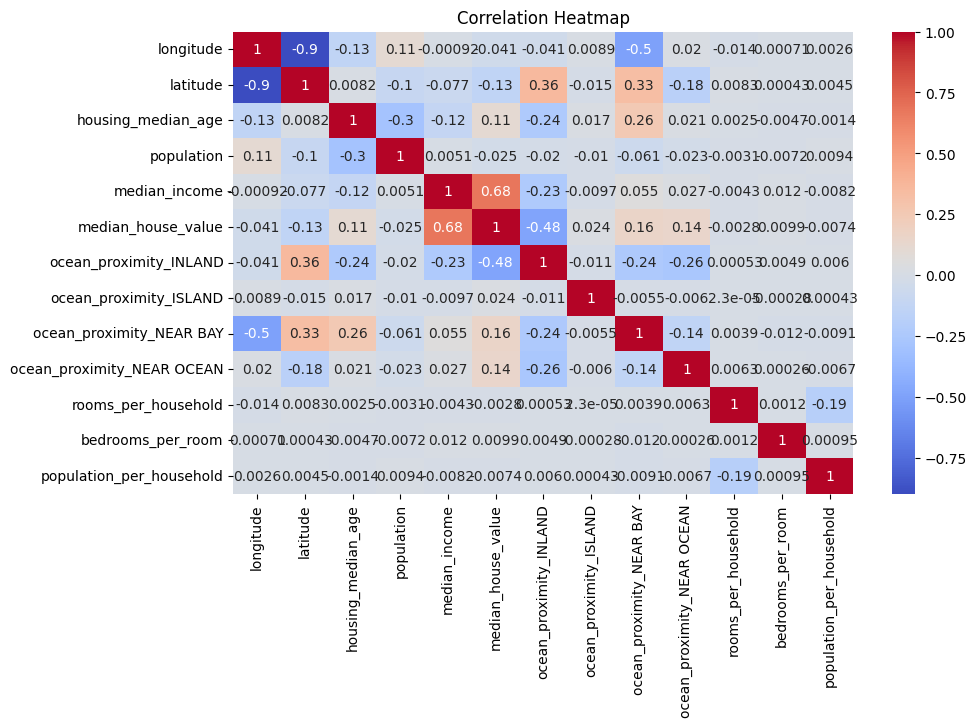

In [192]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

model with feature engineering and no selection

model with selected features and feature engineering

✅ Model Trained Successfully with Selected Features!
📉 Mean Absolute Error (MAE): 57267.35096566348
📊 Root Mean Squared Error (RMSE): 79393.54185423825


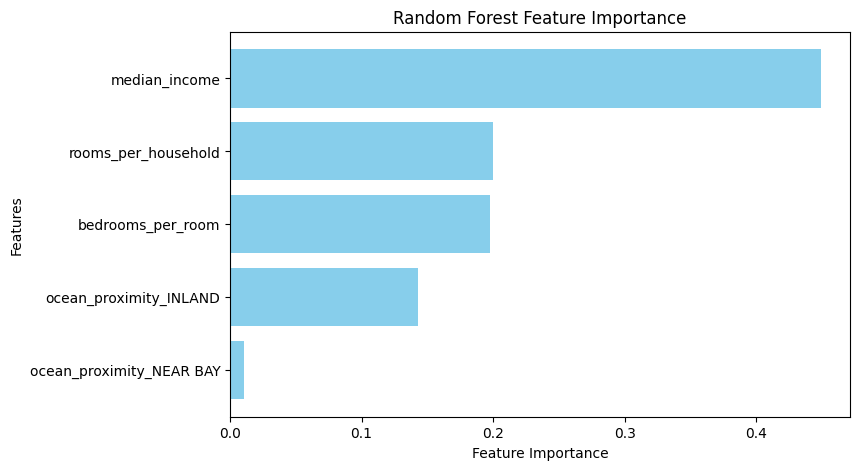

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

selected_features = [
    'median_income', 
    'ocean_proximity_INLAND', 
    'ocean_proximity_NEAR BAY', 
    'bedrooms_per_room', 
    'rooms_per_household'
]

# Define Features (X) and Target Variable (y)
X = df[selected_features]  # Use only selected features
y = df['median_house_value']

# Split Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize & Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Model name changed to rf_model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print Results
print("✅ Model Trained Successfully with Selected Features!")
print("📉 Mean Absolute Error (MAE):", mae)
print("📊 Root Mean Squared Error (RMSE):", rmse)

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


